In [1]:
%cd ..

/Users/danorel/Workspace/Education/Self-Education/Programming/AI/MuJoCo/rlab


In [2]:
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import mediapy as media

In [3]:
m = mujoco.MjModel.from_xml_path("tutorial/models/tippe_top.xml")
d = mujoco.MjData(m)

In [4]:
renderer = mujoco.Renderer(m)

In [5]:
duration = 5
fps = 60

frames = []
mujoco.mj_resetDataKeyframe(m, d, 0)
while d.time < duration:
    mujoco.mj_step(m, d)
    if len(frames) < d.time * fps:
        renderer.update_scene(d, camera="closeup")
        pixels = renderer.render()
        frames.append(pixels)
media.show_video(frames, fps=fps)

In [6]:
duration = 5

timevals = []
angular_velocities = []
stem_heights = []

mujoco.mj_resetDataKeyframe(m, d, 0)
while d.time < duration:
    mujoco.mj_step(m, d)
    timevals.append(d.time)
    angular_velocities.append(d.qvel[3:6].copy())
    stem_heights.append(d.geom_xpos[2,2])

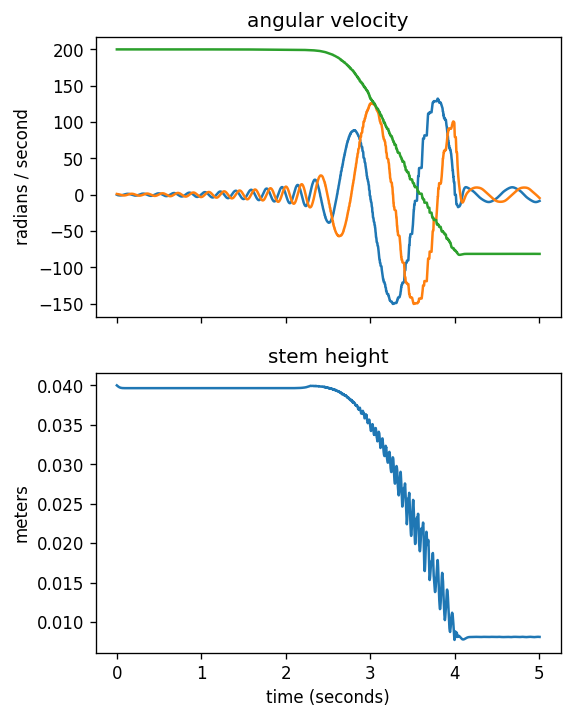

In [7]:
dpi = 120
width = 600
height = 800
figsize = (width / dpi, height / dpi)
_, ax = plt.subplots(2, 1, figsize=figsize, dpi=dpi, sharex=True)

ax[0].plot(timevals, angular_velocities)
ax[0].set_title('angular velocity')
ax[0].set_ylabel('radians / second')

ax[1].plot(timevals, stem_heights)
ax[1].set_xlabel('time (seconds)')
ax[1].set_ylabel('meters')
_ = ax[1].set_title('stem height')